# Introduction

J'ai décidé de reprendre le TP fait en R concernant la classification automatique: agrégation autour de k centres mobiles. 

# 1.1 Générer données bivariées

Les données sont générées de manières aléatoires: np.random.normal.

In [1]:
import numpy as np 
import pandas as pd

# taille de notre jeu de données: 
n = 200

# on construit x : 
    # genere aléatoirement valeurs d'une loi normal 
    # avec mu = 0 et sigma = 1, n/2 fois (100 fois)
x1 = np.random.normal(0, 1, n//2)
    # genere aléatoirement valeurs d'une loi normal 
    #avec mu = 4 et sigma = 2, n/2 fois (100 fois)
x2 = np.random.normal(4, 2, n//2)
    # creer une liste contenant tous les x 
x = np.append(x1,x2)

# on construit y : 
    # genere aléatoirement valeurs d'une loi normal 
    #avec mu = 0 et sigma = 1, n/2 fois (100 fois)
y1 = np.random.normal(0, 1, n//2)
    # genere aléatoirement valeurs d'une loi normal 
    # avec mu = 4 et sigma = 2, n/2 fois (100 fois)
y2 = np.random.normal(4, 2, n//2)
    # creer une liste contenant tous les y 
y = np.append(y1,y2)

# créeer notre dataframe contenant x et y en colonne
d = pd.DataFrame([x,y]).T
d.columns = ("x", "y")
d

,x,y
0,0.013665,-2.162259
1,0.217755,0.341889
2,-0.098444,0.889376
3,-0.865122,0.782425
4,0.665906,0.173657
...,...,...
195,4.054189,1.970761
196,6.940614,6.531884
197,3.210500,1.514319
198,4.085610,3.053662


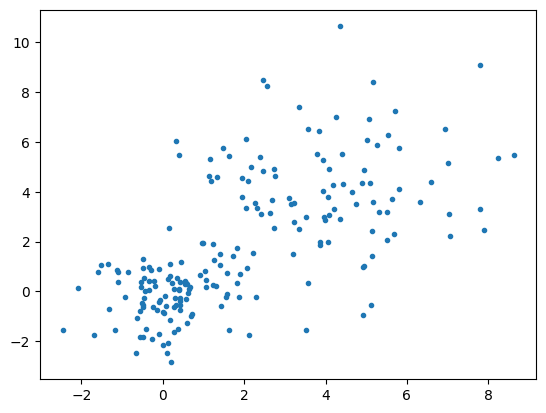

In [2]:
import matplotlib.pyplot as plt 

# affiche nos données sur un plot (x en fonction de y)
    # affiche nos données par des points (.)
plt.plot(d.iloc[:,0], d.iloc[:,1], '.')

Avec ce graphique, nous distinguons 2 groupes d'individus. 

# 1.2. Kmeans

Il est possible d'utiliser la bibliothèque libre de Python : Scikit-learn. Elle permet de faire un partionnement des données dont kmeans. 

In [3]:
from sklearn.cluster import KMeans

# création du modèle 
    # demande que pour 2 groupes de classes (0 et 1)
km = KMeans(2)
km.fit(d)

    # labels_ permet d'afficher dans quel ligne est groupé nos données 
    # (première ligne dans le groupe 1 par exemple)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Ainsi, il est possible de voir la partition obtenue. 

On remarque qu'avec python, les deux classes sont 0 et 1 alors que sur R se sont 1 et 2.

# 1.3. Représentation classification 

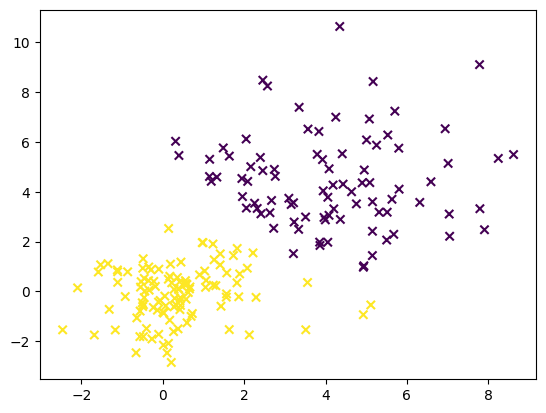

In [4]:
# scatter : nuage de points de nos donneés (x en fonction de y)
    # affiche nos donnée savec des croix 
    # coloris en fonction de nos labels
    # donc en fonction du groupe dans lequel appartient chaque ligne
plt.scatter(d.iloc[:,0],d.iloc[:,1], marker='x', c=km.labels_)

Ce graphique coloré confirme les 2 groupes que l'on peut voir dans le premier graphique où les classes ne sont pas représentées.

# 1.4. Inertie intraclasse

Pour commencer, nous pouvons obtenir la gravité des classes:

In [5]:
km.cluster_centers_

array([[ 4.09747378,  4.40908262],
       [ 0.36814428, -0.10783927]])

Nous pouvons également obtenir la taille de chaque classe:

In [6]:
# unique est fonction de numpy qui donne toutes les vairables unqiue 
# (donc qu'une fois) qu'il y a dans nos labels (0 et 1 ici)
    #return_counts : permet de compter combien il y a de 1 et 0 
unique, counts = np.unique(km.labels_, return_counts=True)

# on l'affiche sous la forme d'un dataframe
pd.DataFrame(counts, unique)

,0
0,88
1,112


De plus, il est possible d'obtenir l'intertie intraclasse:

In [7]:
# inertia_ donne l'intertie total 
intra = km.inertia_/n
intra

4.439697752074726

Cependant, il me semble impossible d'avoir l'inertie pour chaque classe.

# 1.5. Inertie interclasse

Je n'ai pas trouvé un moyen, avec python, d'avoir l'inertie intraclasse. Mais, nous pouvons le calculer.

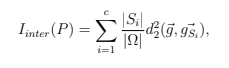

In [8]:
import math 

    #calcul à la "main" le centre de gravité de nos données 
centre_gravite_omega = np.array(np.mean(d, axis=0))
    #recupere le centre de gravite de chaque classe  
center_gravite_class = km.cluster_centers_
    # taille total de notre jeu de données
cardinal_omega = n
    # taille compté juste au dessus avec np.unique 
cardinal_class = counts

# initialise 
inter = 0

# applique la formule juste au-dessus 
for i in range(1):
    dist = ((math.dist(list(centre_gravite_omega),list(center_gravite_class[i])))**2)
    inter += (cardinal_class[i]/cardinal_omega)*dist
    
inter

4.7342975318561855

Le résultat n'est pas cohérent avec celui obtenu sur R. 

Mais le calcul semble correcte. 

On peut maintenant calculer l'inertie totale. 

In [9]:
# somme 
inter + intra

9.17399528393091

# 1.6. Choix clusters

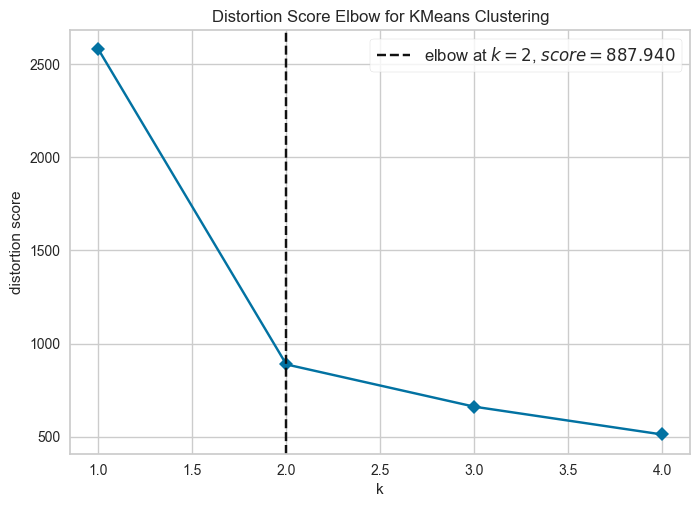

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer

# lance notre modèle sans spécifier le nombre de classe 
model = KMeans()
# KElbowVisualizer en prenant des clusters de 1 à 5 
# permet d'afficher leur inertie dans un graphique pour qu'on puisse choisir 
visualizer = KElbowVisualizer(model, k=(1,5),timings=False).fit(d)
visualizer.show()

Ce graphique nous permet de voir l'inertie intra-classe en fonction du nombre de classes. 

On remarque un changement significatif dans les données lorsqu'il y a 2 classes. Ce graphique voit également ce coude pour ce nombre de classes. Il est donc préférable de prendre 2 classes. 


Le coude est donc automatiquement localisé. Nous voyons que nous optenons également son score (884) qui représente l'indice de Calinski-Harabasz. C'est une mesure de qualité d'une partition d'un ensemble de données. Elle se calcul en faisant le rapport entre la variance inter-groupes et la variance intra-groupe. De ce fait si nous avons une grande valeur, cela veut dire que notre choix représente un bon regroupement. 
Ce qui est le cas ici.

# 1.7. Partition en trois classes

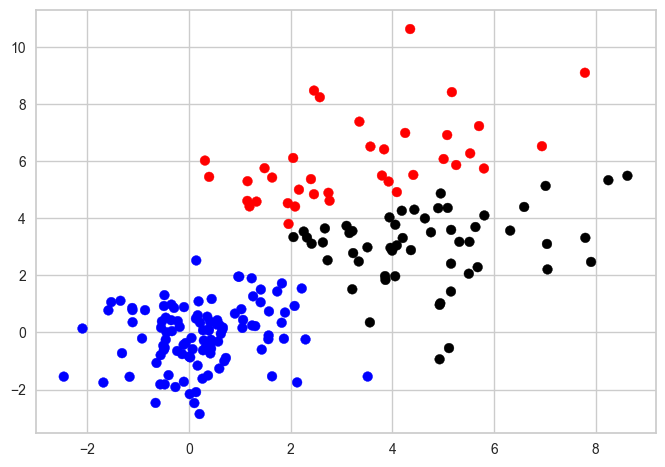

In [11]:
# création du modèle 
    # demande que pour 3 groupes de classes (0, 1 et 2)
km3 = KMeans(3)
km3.fit(d)
# intialise les couleurs 
colors = ['black','blue','red']
# affiche dans un graphique x en fonction de y 
# en colorant les données en fonction de leur appartenance à un groupe 
plt.scatter(d.iloc[:,0],d.iloc[:,1], c=[colors[l]for l in km3.labels_])

On remarque que des individus sont proches alors qu'ils sont dans des classes différentes. 

# 2.1. USArrests: données centrées-réduites

Contrairement à R, les donneés USArrests ne sont pas disponibles dans une librairie de Python. J'ai donc récupéré les données sur Kaggle.

In [12]:
from sklearn.preprocessing import scale

# récupère données csv qui ont comme séparateur "," 
# et index_col indique que le nom de chaque ligne est indiqué 
data_us = pd.read_csv("USArrests.csv", sep = ",", index_col=0)

# scale : fonction qui centre et réduit nos données 
df = scale(data_us)

# 2.2. Kmeans

d:\python_prj\datamining\venv\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
d:\python_prj\datamining\venv\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


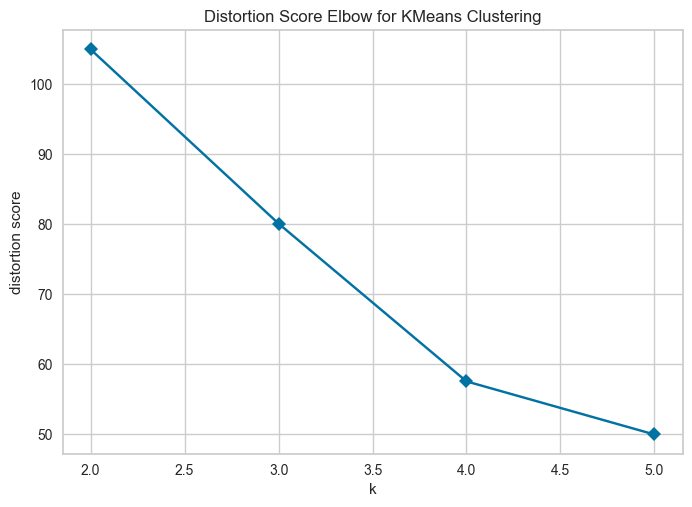

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# lance notre modèle sans spécifier le nombre de classe 
km_us = KMeans()

# KElbowVisualizer en prenant des clusters de 2 à 6 
# permet d'afficher leur inertie dans un graphique pour qu'on puisse choisir 
visualizer = KElbowVisualizer(km_us, k=(2,6),timings=False).fit(df)
visualizer.show()

D'après ce graphique, il serait préférable de prendre 4 classes car nous remarquons un coude. 

Cependant la fonction KElbowVisualizer n'a pas pu localiser de coude, d'où le warning. 

# 2.3. Centre gravité et inertie de chaque classe

In [14]:
centre_gravite = []
inert = []

# recupere centre de gravité et inertie dans une boucle 
# boucle : va lancer notre modèle pour un nombre de clusters de 2 à 6 compris 
for i in range(2,7):
    km_us = KMeans(i)
    km_us.fit(d)
    centre_gravite.append(km_us.cluster_centers_)
    inert.append(km_us.inertia_)

Centre de gravité:

In [15]:
centre_gravite

[array([[ 4.09747378,  4.40908262],
        [ 0.36814428, -0.10783927]]),
 array([[ 0.25352278, -0.10039409],
        [ 3.29910394,  6.03768098],
        [ 4.66868561,  3.02722281]]),
 array([[ 2.25137167,  4.47995146],
        [ 0.25352278, -0.10039409],
        [ 4.91851429,  2.72933407],
        [ 5.2330546 ,  6.82344388]]),
 array([[ 0.63512435,  0.60854152],
        [ 5.11365744,  6.69945185],
        [-0.21374444, -0.96847851],
        [ 2.13647056,  4.41440974],
        [ 4.91851429,  2.72933407]]),
 array([[ 4.36581293,  2.45474677],
        [ 0.51240991,  0.54430305],
        [-0.17585098, -1.16964789],
        [ 2.23502729,  4.54713719],
        [ 6.60620618,  4.29615209],
        [ 4.55470515,  7.3441111 ]])]

Inertie intraclasse:

In [16]:
pd.DataFrame(inert,range(2,7)).T

,2,3,4,5,6
0,887.93955,661.123367,511.865182,425.155484,361.287221


# 2.4. ACP

In [17]:
from sklearn.decomposition import PCA

# initialise notre modèle d'ACP
pca_us = PCA()

# l'exécute sur nos données 
pca_us.fit(df)

# recupere le taux d'explication de chaque composante en pourcentage 
pca_us.explained_variance_ratio_*100

array([62.00603948, 24.74412881,  8.91407951,  4.33575219])

In [18]:
# calcul le taux cumulé d'explication de chaque composante en pourcentage 
    # cumsum de numpy permet de faire la somme cumulé de nos données
cumul_explained_var = np.cumsum(pca_us.explained_variance_ratio_)*100
cumul_explained_var

array([ 62.00603948,  86.75016829,  95.66424781, 100.        ])

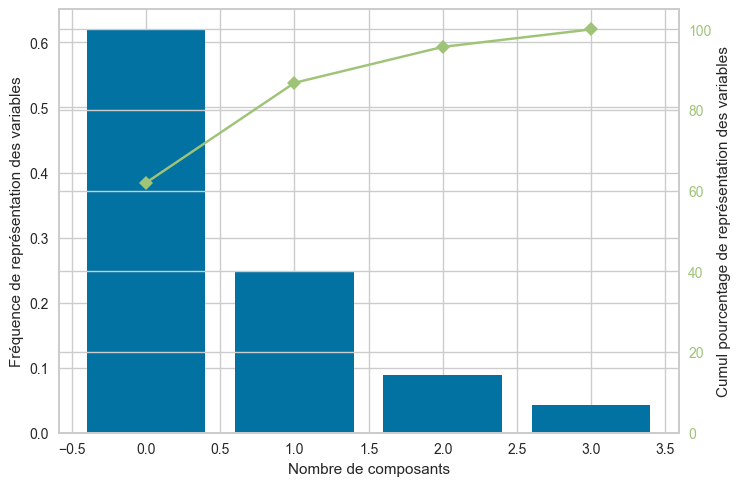

In [19]:
# met dans y les ratios des variables expliquées 
y = list(pca_us.explained_variance_ratio_)

# met dans x le nombre de composante 
x = range(len(pca_us.explained_variance_ratio_))

# affiche un graphique
fig, ax = plt.subplots()

# graphique en bar de x (4)
# en fonction de y (taux d'explication de chaque composante)
ax.bar(x,y)

# ajoute un autre graphique
ax2 = ax.twinx()
# courbe qui affiche le taux d'explication cumulé 
    # courbe verte et points marqué par des losanges (marker='D')
ax2.plot(x,cumul_explained_var, color="g", marker="D")
ax2.tick_params(axis="y", colors="g")

    # nomme nos axes
ax.set_xlabel("Nombre de composants")
ax.set_ylabel("Fréquence de représentation des variables")

ax2.set_ylabel("Cumul pourcentage de représentation des variables")

    # gère la taille de y - va de 0 à 105 (côté droit)
plt.ylim(0,105)

plt.show()

Nous remarquons que les 2 premières composantes expliquent bien à elle seule les variables. En effet, elles représentent 86.75% des variables.

In [20]:
cumul_explained_var[1]

86.75016829223338

Il n'existe pas de foncion dans la librarie qui permet d'afficher directement un biplot. Suite à mes recherches, j'ai trouvé plusieurs fonctions permettant de créer ce graphique. J'ai trouvé la fonction suivante (que j'ai légèrement modifié car cette fonction a été faite pour les données du jeu de données Iris):

In [21]:
def biplot(score, coeff , y, data=False):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
       
       data: if true show the data on the graph, else we don't
   '''
    # initialise nos variables 
        # projection on PC1
    xs = score[:,0] 
        # projection on PC2
    ys = score[:,1] 
        # number of variables
    n = coeff.shape[0] 

    # initialise taille et axes de notre graphique
    figure, axes = plt.subplots(figsize=(10,8), dpi=100)
        
    # si paramètre data vrai 
    if data:
        # on centre nos données pour que cela reste dans un espace de 1 x 1 
        # afin que ça rentre dans le graphique
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
        # initialise les couleurs et les marquages 
        colors = ['g','r','y','b']
        markers=['o',',','x','.']
        # pour chaque données 
        for s,l in enumerate(y):
            # nuage de point pour afficher nos données
            axes.scatter(xs * scalex,ys * scaley, c = colors[s], 
                         marker=markers[s]) 
            
    # créer un cercle bleu de rayon 1
    circle1 = plt.Circle((0, 0), 1, color='b', fill=False)
    
    
    for i in range(n):
        # affiche des flèches pour chaque score des variables 
        # (chaque variable a un score pour la 1er compsoante et la 2ème)
        axes.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',linestyle = '-',
                   linewidth = 2)
        axes.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), 
                  color = 'k', ha = 'center', va = 'center',fontsize=13)

    # affiche tout sur le graphique 
    axes.add_patch(circle1)
        # labélise 
    axes.set_xlabel("PC{}".format(1), size=14)
    axes.set_xlabel("PC{}".format(2), size=14)
        # taille de nos axes
    axes.set_xlim([-1.5,1.5])
    axes.set_ylim([-1.5,1.5])
        # affiche la grille en fond
    axes.grid(True)
        # modifie l'affichage de nos labels
    axes.tick_params(axis='both', which='both', labelsize=14)

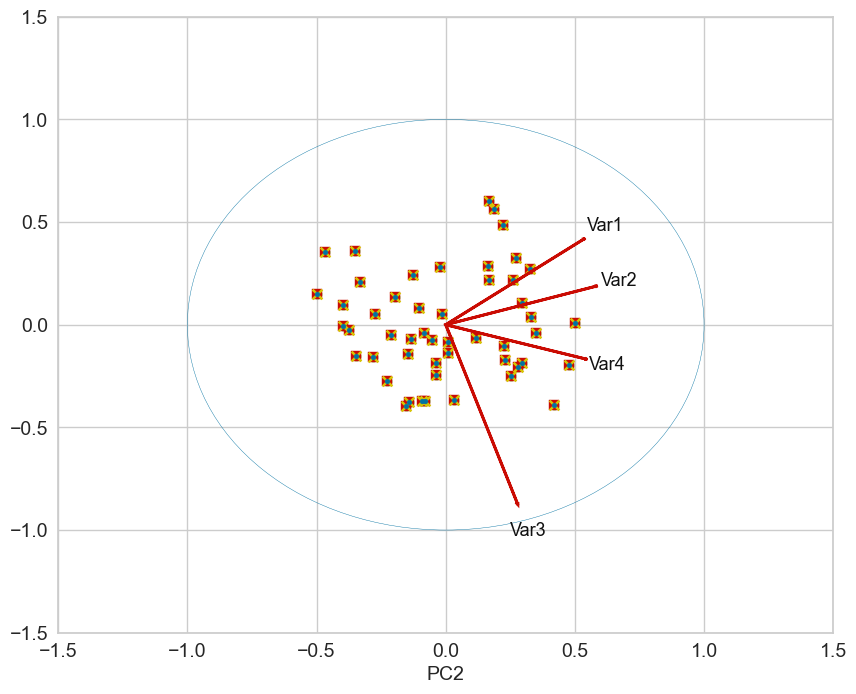

In [22]:
# lance l'ACP en prenant que 2 composantes
pca = PCA(2)
x_new = pca.fit_transform(df)
# donne nos labels 
y_label = ['Murder','Assault','UrbanPop','Rape']
# appelle notre fonction pour lancer notre graphique 
biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),y=y_label, data=True)
plt.show()

- Var1 : UrbanPop
- Var2 : Rape
- Var3 : Murder
- Var4 : Assault

Malheureusement, je n'ai pas réussi et il me semble même pas possible d'afficher directement le nom des variables car lorsque nous appliquons la fonction PCA de sklearn, le nom de nos variables disparaissent.

Il est donc difficile de visualiser la qualité de la classification car cette méthode n'est pas développer d'une manière optimiser, voir complète, dans les libraries de Python. 